## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку. Нужен ответ на вопрос: насколько такие фильмы интересны зрителю. 
Я будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 


### Шаг 1. Открыл файлы с данными 
</div>

In [1]:
import pandas as pd
movies = pd.read_csv('/Users/artemmm/Downloads/mkrf_movies.csv')
shows = pd.read_csv('/Users/artemmm/Downloads/mkrf_shows.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [2]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors = 'coerce')
movies['puNumber'].fillna(-1, inplace = True)
movies = movies.astype({'puNumber':'int64'})
movies =  movies[movies['puNumber'] != -1]

Из-за пропусков я не могу изменить тип всего столбца, изначально думал заменить на заглушки, но потом решил удалить их, потому что будут проблемы при объединении столбцов. Удаляю пропуски, чтобы изменить его тип.

В строчке выше я удалил пропуски, а в следующей строчке заменил тип строки на int64

In [3]:
movies.info()#проверяем

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: float6

Следующим шагом я объединю датафреймы:

In [4]:
data = movies.merge(shows, on = 'puNumber', how = 'left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Проверяем - не произошла ли потеря данных после объединения.

In [5]:
print(data.shape)
print(movies.shape)
print(shows.shape)

(7485, 16)
(7485, 15)
(3158, 2)


Потери данных не произошло!

### Шаг 2. Предобработка данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Шаг 2.1. Проверил типы данных

In [7]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Из-за пропусков в столбце 'ratings' я не могу изменить его тип. Так как их мало, я их удалю. Заполнять пропуски медианным значением -  плохой вариант потому, что это индивидуальная оценка для каждого фильма.

In [8]:
data['show_start_date']

0       2015-11-27T12:00:00.000Z
1       2016-09-13T12:00:00.000Z
2       2016-10-10T12:00:00.000Z
3       2016-06-10T12:00:00.000Z
4       2015-07-29T12:00:00.000Z
                  ...           
7480    2019-12-23T12:00:00.000Z
7481    2019-12-24T12:00:00.000Z
7482    2019-12-28T12:00:00.000Z
7483    2019-12-30T12:00:00.000Z
7484    2019-12-30T12:00:00.000Z
Name: show_start_date, Length: 7485, dtype: object

In [9]:
#data['ratings'].unique() #смотрел уникальные значения
data['ratings'] = pd.to_numeric(data['ratings'], errors = 'coerce')
data['ratings'].unique()
data['ratings'] = data['ratings'].dropna()
data = data.astype({'ratings':'float64', 'box_office':'float64'}, errors = 'raise')
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ'
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Вывод: на этом шаге я изменил тип данных в столбцах 'box_office', 'ratings', 'show_start_date' тк они не соответствовали описанию, их тип object, хотя два столбца - числовые, третий - datetime64.

#### Шаг 2.2. Изучил пропуски в датафрейме

In [10]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

В данной ситуации нелегко определить дальнейшую судьбу пропусков. 

Пропуск в столбце 'film_studio' я удалю, тк мы не можем узнать какая именно студия выпустила фильм.

In [11]:
data_new = data #создаем новый датафрейм в котором будем удалять пропуски

In [12]:
data_new['film_studio'] = data_new['film_studio'].dropna()

Далее - пропуск в столбце 'production_country'. Посмотрю какая студия сняла фильм.

In [13]:
data_new[data_new['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [14]:
data_new.loc[data_new['film_studio'] == 'ООО "Продюсерский центр ЕРАЛАШ"', 'production_country'].unique()

array(['Россия', nan], dtype=object)

Меняю пропуск на 'Россия'.

In [15]:
data_new.loc[3185, 'production_country'] = 'Россия'
data_new = data_new.dropna(subset = ['production_country'])

Пропуск в столбце 'director' - удаляю, режиссера мы никак не можем узнать. Такая же обстановка со столбцом 'producer'.

In [16]:
data_new = data_new.dropna(subset = ['director', 'producer'])

пропуски в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' меня напрягают, тк их одинаковое кол-во: 7153. Возможно, это пропуски в одних и тех же фильмах, проверю это:

In [17]:
data_new[((data_new['refundable_support'].isna() == True) & (data_new['nonrefundable_support'].isna() == True) & 
 (data_new['budget'].isna() == True) & (data_new['financing_source'].isna() == True))]['title'].count()

6582

Да, большинство пропусков это пропуски в одних и тех же фильмах. Возможно, просто это нулевые значения, которые стали пропусками при заполнении. Тк фильмов с пропусками в этих колонках слишком много, оставим их пропусками ;)

In [18]:
data_new.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                17
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       6582
nonrefundable_support    6582
budget                   6582
financing_source         6582
ratings                   902
genres                    882
box_office               3871
dtype: int64

In [19]:
data_new['title'].count() / data['title'].count() #сколько данных удалилось
data = data_new

В данной ситуации нелегко определить дальнейшую судьбу пропусков. 

Пропуск в столбце 'film_studio' я удалю, тк мы не можем узнать какая именно студия выпустила фильм.

Пропуск в столбце 'production_country' - нашел страну-производителя, и заменил пропуск на него. Остальные удалил.

Пропуск в столбце 'director' - удалил, тк не могу узнать режиссера фильма.

Пропуски в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' - их равное кол-во, тк в основном это пропуски в одних и тех же фильмах. Заменять их чем-либо не стал, так как это индивидуальное значение для каждого произведения. Так как их много - удалить было плохой идеей, я бы потерял большую часть информации.

За весь этот шаг я потерял 8% данных.

#### Шаг 2.3. Изучил дубликаты в датафрейме

In [20]:
data.duplicated().sum()

0

In [21]:
data.nunique()

title                    6212
puNumber                 6910
show_start_date          1946
type                        8
film_studio              5336
production_country        908
director                 4489
producer                 5344
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    288
financing_source            3
ratings                    80
genres                    719
box_office               2861
dtype: int64

In [22]:
data['title'] = data['title'].str.lower() #приводим к нижнему регистру 
#data[data['title'].duplicated() == True]#посмотрел дубликаты, выбрал один
data[data['title'] == 'большая афера']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2176,большая афера,121012316,2016-05-23 12:00:00,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",300.0
2177,большая афера,121016014,2014-07-29 12:00:00,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",1260.0


На примере дубликатов видно: различные даты показов и сумма сбора. Скорее всего, эти фильмы показывали в разных странах. Показывают в одной стране в одну дату, а в другой стране в другую дату, тк фильм нужно успеть перевести на другой язык, озвучить, на это нужно время. Соответственно в разных странах разная сумма сбора, поэтому и возникают дубликаты в столбце 'title'.

In [23]:
data[data['puNumber'].duplicated() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


в puNumber дубликатов нет.

Дубликаты в столбце 'show_start_date' означают, что в один день был показ разных фильмов - это возможно.

Дубликаты в столбце 'type' означают, что существуют фильмы с одним и тем же типом - реально.

Дубликаты в столбце 'film_studio' означают, что у разные фильмы снимали одинаковые студии - реально.

Дубликаты в столбце 'production_country' означают, что одна страна снимает разные фильмы - реально.

Дубликаты в столбцах 'director' и 'producer' означают, что у разных фильмов бывают один режиссер и продюссер - реально.

Дубликаты в столбцах 'age_restriction' означают, что у разных фильмов может быть один возраст ограничения - реально.

Дубликаты в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'  означают, что одинаковые суммы могут быть в этих столбцах у разных фильмов - вполне реально.

Дубликаты в столбце 'rating' означают, что у одних фильмов может быть одинаковый рейтинг - да, такое может быть.

Дубликаты в столбце 'genres' означают, что существуют фильмы с одним и тем же жанром - реально.

Дубликаты в столбце 'box_office' означают, что у разных фильмов может быть одинаковая сумма сбора - реально.

#### Шаг 2.4. Изучил категориальные значения

In [24]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце type есть значения, перед которыми появились пробелы. Это нужно исправить.

In [25]:
data.loc[data['type'] == ' Художественный','type'] = 'Художественный'
data.loc[data['type'] == ' Анимационный','type'] = 'Анимационный'
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Значения исправил.

Но остались такие же пропуски в других категориальных столбцах, поэтому, применяя .str.strip() я сделаю изменения в каждом категориальном столбце.

In [26]:
data['film_studio'] = data['film_studio'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['age_restriction'] = data['age_restriction'].str.strip()
data['genres'] = data['genres'].str.strip()

Практически во всех столбцах встречается проблема - пробелы в начале строки. В этом шаге я исправил данную проблему.

#### Шаг 2.5. Проверил количественные значения

In [27]:
data[data['budget'] < data['refundable_support'] + data['nonrefundable_support']]
data.loc[data['budget'] == 0, 'budget'] = data['refundable_support'] + data['nonrefundable_support']

Бюджет 0, но есть финансирование от государства. Думаю, что это фильмы, финансирование которых полностью осуществляется государством. Заменю эти значения на сумму поддержки от государства.

Проверим аномальные значения финансирования в столбцах 'budget', 'refundable_support', 'nonrefundable_support'

<Axes: >

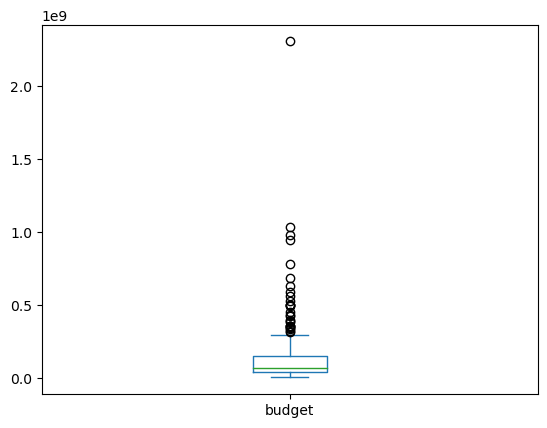

In [28]:
data['budget'].plot(kind = 'box')

Ящик с усами показывает, что значения выше 0,3 - 0,4 считаются аномальными, для начала посмотрим - сколько их.

In [29]:
data[data['budget'] > 300000000]['budget'].count()

28

Тк их очень мало, удалим их. создадим новый датафрейм, чтобы следить за процентом удаленной информации, так как она не должна превышать 10%

In [30]:
data_new1 = data.copy()

In [31]:
data_new1['budget'] = data_new1[data_new1['budget'] < 300000000]['budget']

61


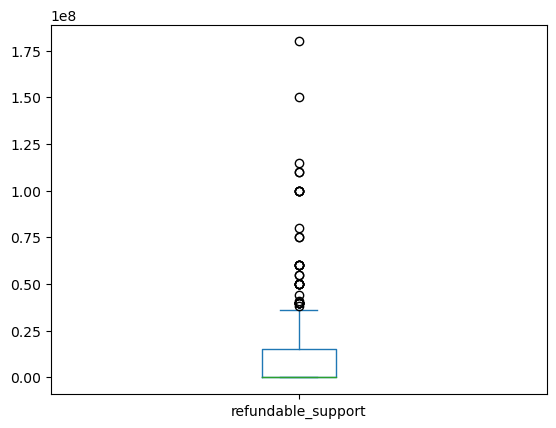

In [32]:
data_new1['refundable_support'].plot(kind = 'box')
print(data_new1[data_new1['refundable_support'] > 23000000]['refundable_support'].count())
data_new1['refundable_support'] = data_new1[data_new1['refundable_support'] < 40000000]['refundable_support']

удалил значения в столбце 'refundable_support', которые ящик с усами показал выбросами, их около 44 штук, поэтому мы теряем небольшую часть общего объема информации.

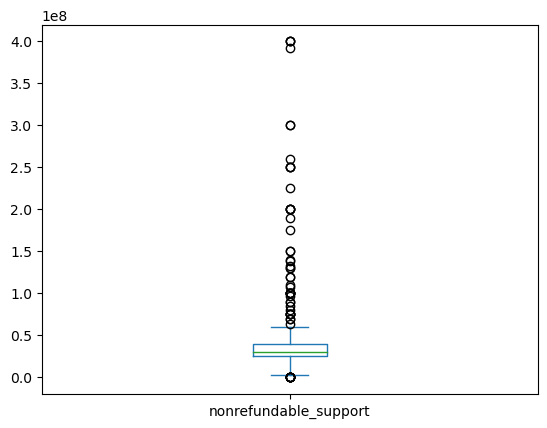

In [33]:
data_new1['nonrefundable_support'].plot(kind = 'box')
data_new1[data_new1['nonrefundable_support'] > 50000000]['nonrefundable_support'].count()
data_new1['nonrefundable_support'] = data_new1[data_new1['nonrefundable_support'] < 100000000]['nonrefundable_support']

30 значений ящик с усами определил выбросами, удалим их.

In [34]:
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6912 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6912 non-null   object        
 1   puNumber               6912 non-null   int64         
 2   show_start_date        6912 non-null   datetime64[ns]
 3   type                   6912 non-null   object        
 4   film_studio            6895 non-null   object        
 5   production_country     6912 non-null   object        
 6   director               6912 non-null   object        
 7   producer               6912 non-null   object        
 8   age_restriction        6912 non-null   object        
 9   refundable_support     292 non-null    float64       
 10  nonrefundable_support  296 non-null    float64       
 11  budget                 300 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

In [35]:
data = data_new1

Раньше у нас было 330 строк в каждом столбце, после удаления аномальных значений стало не более чем на 10% меньше в каждой строке.

#### Шаг 2.6. Добавил новые столбцы





- Создал столбец с информацией о годе проката. Выделил год из даты премьеры фильма.

Приводим к нормальному формату столбец 'show_start_date'

In [36]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y-%m-%dT%H:%M:%S'
)

создаем столбец с информацией о годе проката.

In [37]:
data['year_start_date'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [38]:
def name(row):
    name = row['director']
    name = str(name).split(',')
    name = name[0]
    return name
data['main_name'] = data.apply(name, axis = 1)
def genres(row):
    genres = row['genres']
    genres = str(genres).split(',')
    genres = genres[0]
    return genres
data['main_genre'] = data.apply(genres, axis = 1)
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,main_name,main_genre
0,открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
2,особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
7,любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Фил Грабски,nan
7481,звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик
7482,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Чарльз Е.Бастьен,nan
7483,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,А.Беляев,nan


- Посчитал, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
(data['refundable_support'] + data['nonrefundable_support'] / (data['budget'])).median()

0.6496963868705403

В среднем 66% бюджета составляет доля гос.поддержки.

### Шаг 3. Провёл исследовательский анализ данных


- Посмотрел, сколько фильмов выходило в прокат каждый год. Посчитал, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [40]:
data_none_nan = data #создаем промежуточный датафрейм
data_none_nan = data_none_nan.dropna(subset = ['box_office'])#удаляем пропуски в колонке с информацией о прокатах
data_none_nan.sort_values(by = ['year_start_date'])['year_start_date'].value_counts()#считаем кол-во фильмов в прокате за год

year_start_date
2016    518
2019    517
2018    469
2015    450
2017    356
2014    242
2013    154
2012    125
2011    107
2010    103
Name: count, dtype: int64

Вот столько фильмов выходило в прокат каждый год.

<Axes: title={'center': 'количество фильмов в прокате по годам'}, xlabel='year_start_date'>

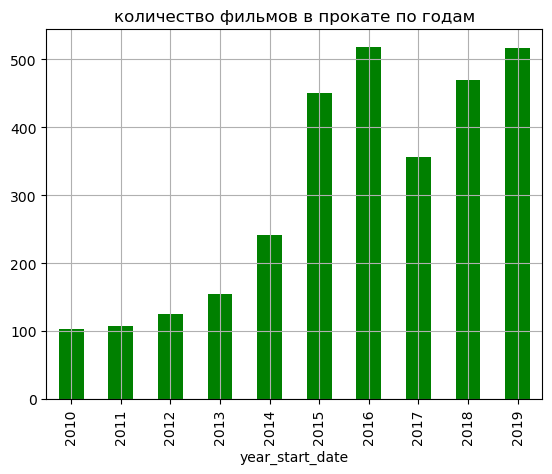

In [41]:
data_none_nan['year_start_date'].value_counts(sort = True).sort_index().plot(title='количество фильмов в прокате по годам',kind = 'bar', grid = True, color = 'green')

In [42]:
data_none_nan.shape[0]/data.shape[0]

0.43995949074074076

Всего 43% фильмов имеют информацию о прокатах.

Отсортировал по годам, стабильность была видна до 2016, потом резкое падение и снова рост. Думаю, что-то случилось в 2017 году в 

- Изучил, как менялась динамика проката по годам. В каком году сумма сборов была минимальной, а в каком максимальной.

<Axes: title={'center': 'количество фильмов в прокате по годам'}, xlabel='year_start_date'>

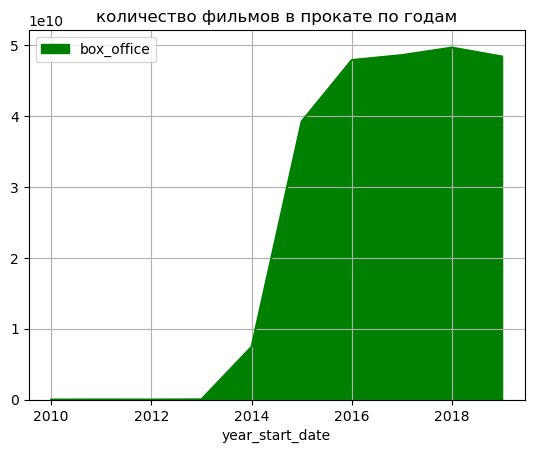

In [43]:
data_none_nan.pivot_table(index = 'year_start_date', values = 'box_office', aggfunc = 'sum').plot(title='количество фильмов в прокате по годам',kind = 'area', grid = True, color = 'green')

в 2010 сумма сборов была минимальной, затем наблюдался рост, и в 2018 достигла пика - максимума.

- С помощью сводной таблицы посчитал среднюю и медианную сумму сборов для каждого года.

In [44]:
data_none_nan.pivot_table(index = 'year_start_date', values = 'box_office', aggfunc = ['mean', 'median'])

,mean,median
,box_office,box_office
year_start_date,,
2010,2.354853e+04,1700.00
2011,1.317376e+05,3000.00
2012,5.515434e+04,5560.00
2013,1.918154e+05,4717.50
2014,3.074005e+07,69120.00
2015,8.712729e+07,5244391.50
2016,9.240322e+07,4091820.05
2017,1.364108e+08,10177833.50


Сводная таблица со средними и медианными суммами сборов для каждого года.

<Axes: xlabel='year_start_date'>

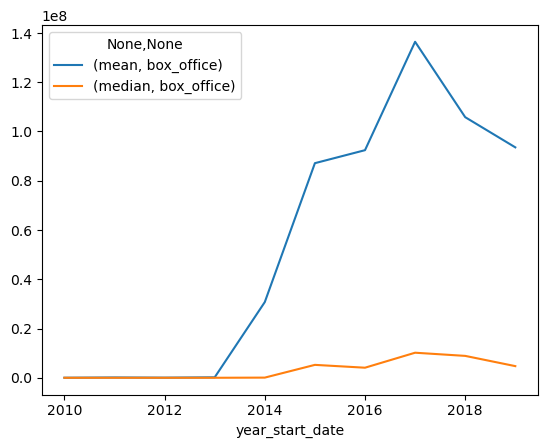

In [45]:
data_none_nan.pivot_table(index = 'year_start_date', values = 'box_office', aggfunc = ['mean', 'median']).plot(kind = 'line')

График со средними и медианными суммами сборов для каждого года. В обоих случаях наблюдается рост до 2017 года, далее - падение суммы.

- Определил, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Нашел фильмы, с каким возрастным ограничением собрали больше всего денег в прокате. Ответил: меняется ли картина в зависимости от года.

<Axes: xlabel='year_start_date'>

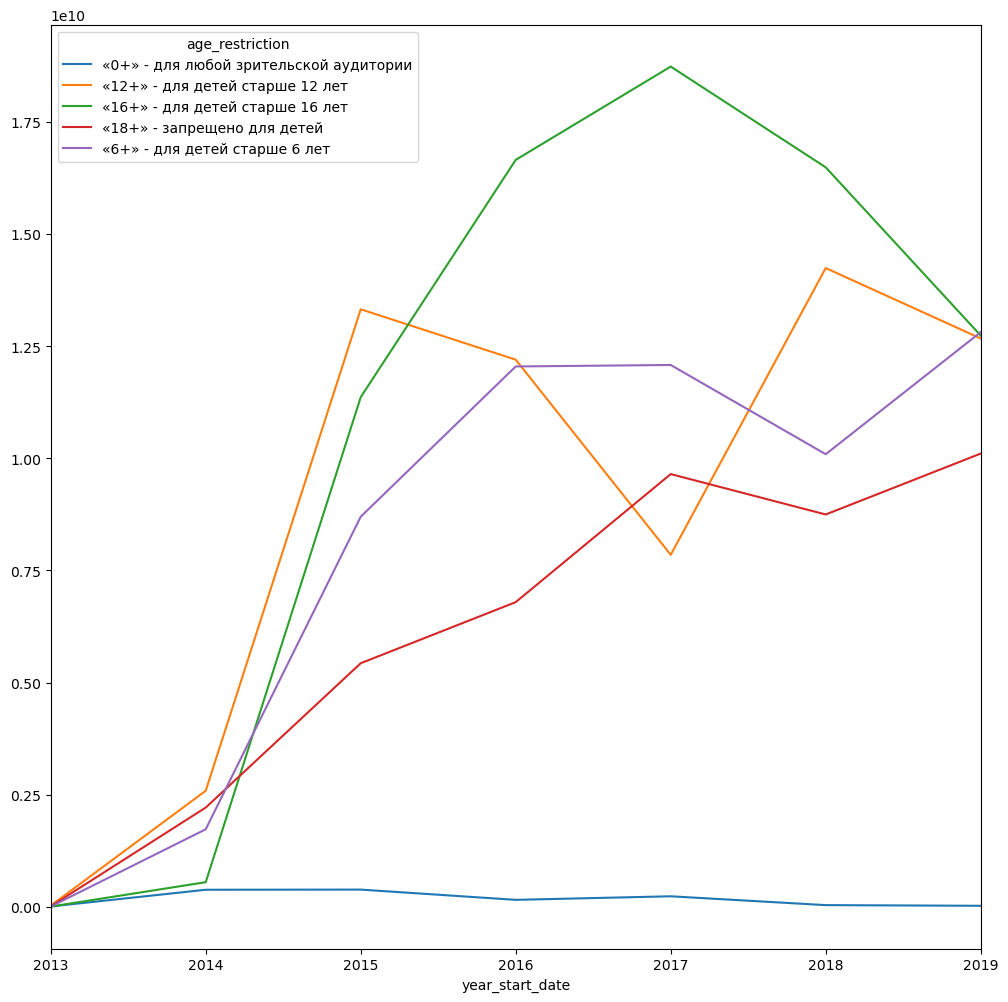

In [46]:
data_none_nan.pivot_table(index = 'year_start_date', columns = 'age_restriction',values = 'box_office', aggfunc = 'sum').plot(kind = 'line', figsize = (12,12), xlim = [2013,2019])

Вывод: да, влияет, фильмы с ограничением 16+ собирают больше остальных, меньше всего - 0+. 

Думаю, фильмы с 0+ собирают меньше всего, потому что это в основном мультфильмы. Их главная аудитория - дети. 

Фильмы 16+ собирают больше всего, скорее всего, потому что это разные жанры фильмов для взрослых, их аудитория уже в разы больше, и, несомненно, разнообразие жанров влияет на количество аудитории. 

Фильмы 18+ на предпоследнем месте в нашем топе. В основном это - хоррор, ужасы. Они нравятся не всем, поэтому аудитория меньше, сборы соответственно тоже.

### Шаг 4. Исследовал фильмы, которые получили государственную поддержку

<Axes: xlabel='year_start_date'>

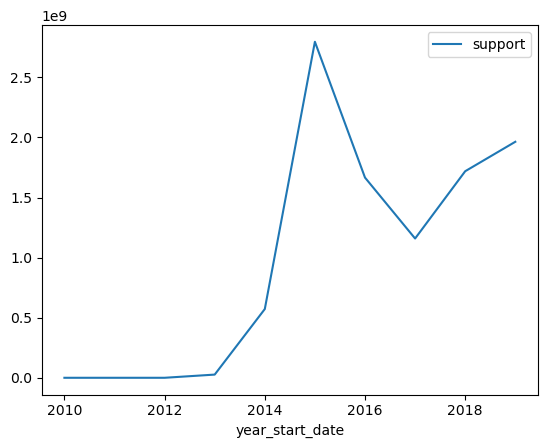

In [47]:
data_four = data
data_four['support'] = data_four['refundable_support'] + data_four['nonrefundable_support']#обьединяем оба типа финансирования
data_four.pivot_table(index = 'year_start_date', values = 'support', aggfunc = 'sum' ).plot(kind = 'line')

в заданиях ранее мы посчитали суммы сборов за прошлые годы. Графики похожи, следовательно - между суммой сбором и финансированием есть некая зависимость. Когда в 2017 финансирование от государства упало, упали и суммы сборов. 

<Axes: xlabel='main_genre'>

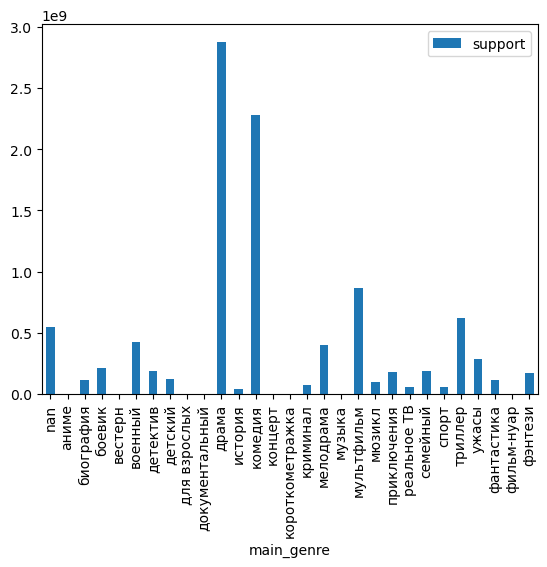

In [48]:
data_four.pivot_table(index = 'main_genre', values = 'support', aggfunc = 'sum',sort=True ).plot(kind = 'bar')

Самый частофинансируемый государством жанр - драма.

Всего окупившихся фильмов: 69


/var/folders/yr/04d7xw_d5610csnyxxj8t5p40000gn/T/ipykernel_19247/440912191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data.apply(profit, axis = 1)


<Axes: xlabel='main_genre'>

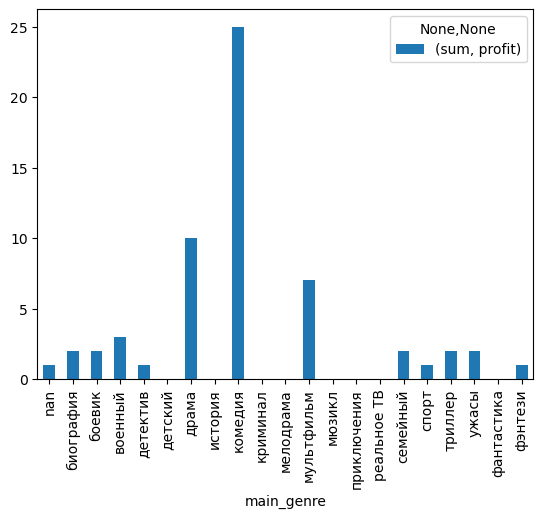

In [49]:
print('Всего окупившихся фильмов:',data[data['box_office'] > data['budget']]['title'].count())
data = data.dropna(subset = ['main_genre', 'box_office', 'support'])
def profit(row):
    if row['budget'] > row['box_office']:
        return 0
    else:
        return 1
data['profit'] = data.apply(profit, axis = 1)
data.pivot_table(index = 'main_genre', values = 'profit', aggfunc = ['sum']).plot(kind = 'bar')

По нашему графику понятно, что комедия окупает себя лучше всех остальных жанров. Наравне - драма и мультфильмы.

Всего окупивших себя фильмов: profit    49
dtype: int64


<Axes: xlabel='ratings'>

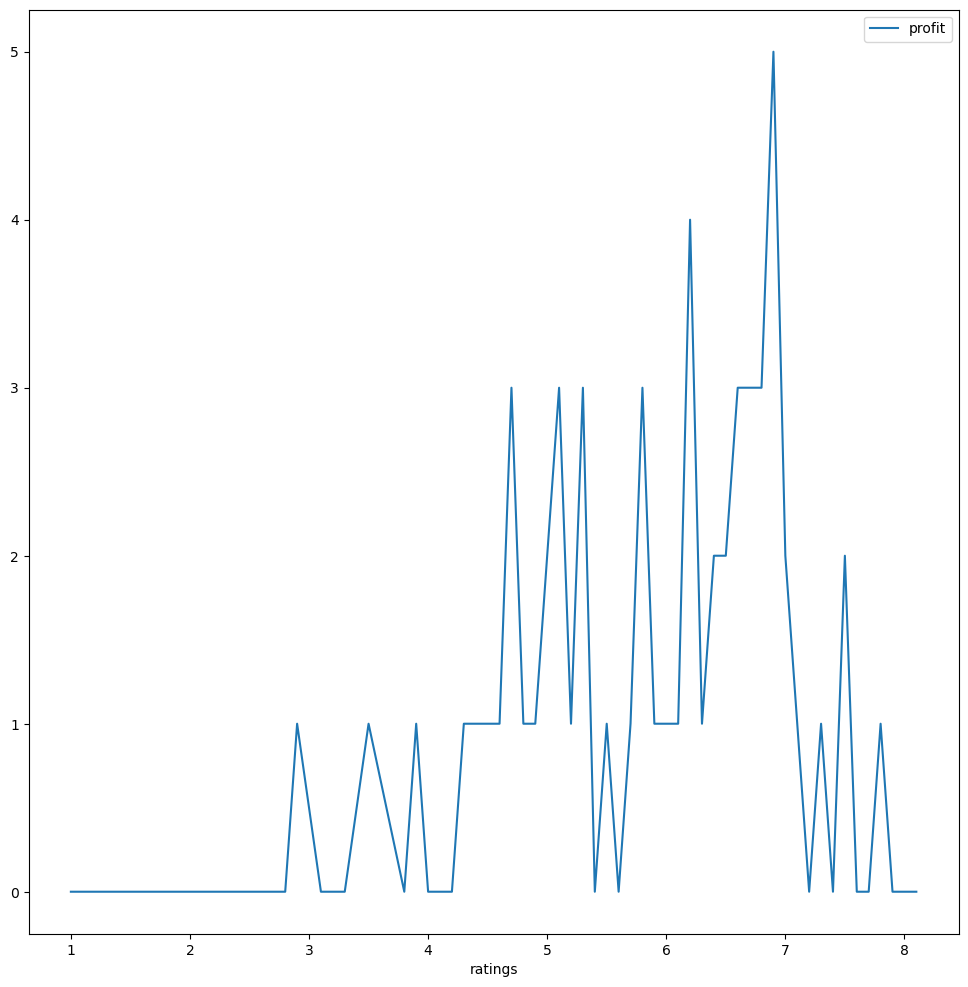

In [50]:
print('Всего окупивших себя фильмов:', data.pivot_table(index = 'ratings', values = 'profit', aggfunc = 'sum').count())
data.pivot_table(index = 'ratings', values = 'profit', aggfunc = 'sum').plot(kind = 'line', figsize = (12,12))

Так как до рейтинга 4.5 почти нет фильмов, окупивших затраты, а в середине видно повышение, а затем пик в районе 7.5, то я могу сделать вывод, что зависимость между рейтингом и шансом окупаемости есть. Будучи у нас больше данных, я бы смог подтвердить свое предположение, пока что это остается догадкой.

В заключении хочу обобщить, что несмотря на то, что государство финансирует по большей части жанр "драма", лучше всего по окупаемости себя показывает жанр "комедия". Окупаемость этого жанра в 2 раза выше, чем у 'драма'. Поэтому, возможно, стоит изменить финансирование с одного жанра, на другой, более выгодный и прибыльный. Три самых перспективных жанра - 'комедия', 'драма', 'мультфильмы'. Они окупаются в разы чаще остальных жанров. 

Государства активно финансируют жанры 'фантастика' и 'история'. Возможно, в жанр фантастики нужно вкладывать меньше денег, так как окупаются такие фильмы очень редко. Жанр 'история' находится в такой же ситуации, но не стоит забрасывать этот жанр, так как люди должны иметь представление о предках, важных исторических событиях в прошлом. Наверное, стоит попробовать снизить финансирование этого жанра.

### Шаг 5. Написал общий вывод

Общий вывод: 

В данной работе я проделал несколько этапов. В самом начале я открыл два датафрейма, поработал с типами столбцов и объединил их в один. После этого снова поработал с типами данных, и приступил к отчистке пропусков. Поработал с дубликатами и непонятными значениями в столбцах. Добавил новые столбцы и изучил значения в некоторых столбцах, после чего приступил к исследованию, на основе которого могу сделать общий вывод: 

с 2010 по 2016 с каждым годом выходило все больше и больше фильмов, в 2017 было резкое падение, после чего возобновился рост. Думаю, 2017 год был переломный в киноиндустрии, из-за чего и было падение в этом году.

В 2018 году был пик по сумме сборов с фильмов, а в 2010 - минимум.

В среднем 2017 год был пик по средней сумме сборов. Общий график показывает рост, то есть - киноиндустрия развивается, и, следовательно, больше зарабатывает.

Больше всего собирают фильмы с ограничением 16+, меньше всех - 0+.

С 2010 государства активно финансировали фильмы, в 2017 резко уменьшили суммы финансирования, из-за этого, возможно и был спад количества фильмов за год в 2017 году.

Самый частофинансируемый жанр государства - драма.

Самый самоокупаемый жанр - комедия. На втором месте - драма.

Из-за недостатка информации нельзя точно сказать по поводу зависимости суммы сборов от рейтинга фильма, но мои догадки на основе 53 произведений разных жанров показывают, что такая зависимость наблюдается.Ъ

